In [23]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim



device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

train_images_path=r"C:\Users\sarma\OneDrive\Desktop\mnist\train-images.idx3-ubyte"
train_labels_path=r"C:\Users\sarma\OneDrive\Desktop\mnist\train-labels.idx1-ubyte"

test_images_path=r"C:\Users\sarma\OneDrive\Desktop\mnist\t10k-images.idx3-ubyte"
test_labels_path=r"C:\Users\sarma\OneDrive\Desktop\mnist\t10k-labels.idx1-ubyte"
x_train = idx2numpy.convert_from_file(train_images_path)
x_train = x_train.reshape(60000,1,28,28)/255
print(x_train.shape)
x_train = torch.tensor(x_train,dtype=torch.float32).to(device)

y_train = idx2numpy.convert_from_file(train_labels_path)
y_train=y_train
print(y_train.shape)

y_train = torch.tensor(y_train,dtype=torch.long).to(device)

x_test=idx2numpy.convert_from_file(test_images_path)
x_test=x_test.reshape(10000,1,28,28)/255
print(x_test.shape)

x_test=torch.tensor(x_test,dtype=torch.float32).to(device)

y_test=idx2numpy.convert_from_file(test_labels_path)

y_test=torch.tensor(y_test,dtype=torch.long).to(device)

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1=nn.Sequential(
            nn.Conv2d(1,32,kernel_size=3,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        
        self.layer2=nn.Sequential(
            nn.Conv2d(32,64,kernel_size=3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2,2) 
        )
        self.flatten=nn.Flatten()
        self.relu=nn.ReLU()
        self.l1=nn.Linear(64*7*7,128)
        self.l2=nn.Linear(128,64)
        self.ol=nn.Linear(64,10)

    def forward(self,x):
        x=self.layer1(x)
        x=self.layer2(x)
        x=self.flatten(x)
        
        x=self.l1(x)
        x=self.relu(x)
        x=self.l2(x)
        x=self.relu(x)
        x=self.ol(x)

        return x
model=CNN().to(device)
criterian=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

epoches=5


cuda
(60000, 1, 28, 28)
(60000,)
(10000, 1, 28, 28)


In [ ]:
batch_size = 32
model.train()
for e in range(epoches):
    for i in range(0,x_train.shape[0],batch_size):
        optimizer.zero_grad()
        x_loop=x_train[i:i+batch_size]
        y_loop=y_train[i:i+batch_size]
        output=model(x_loop)
        loss=criterian(output,y_loop)
        loss.backward()
        optimizer.step()
        


accuracy = 0.9868


Text(0.5, 1.0, 'original1,predicted1')

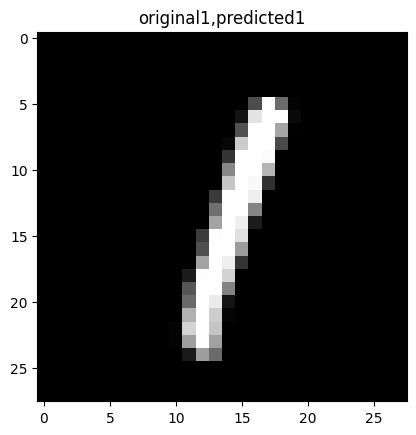

In [36]:
i=5
with torch.no_grad():
    pred=model(x_test)
    pred_labels=torch.argmax(pred,axis=1)

    correct = (pred_labels==y_test).sum().item()
    total = y_test.size(0)
    accuracy = correct/total

print(f"accuracy = {accuracy}")
plt.imshow(x_test[i].cpu().numpy().reshape(28,28),cmap="gray")
plt.title(f"original{y_test[i].item()},predicted{pred_labels[i].item()}")